In [6]:
import os
import pandas as pd
import hvplot.pandas
import seaborn as sns
from pathlib import Path
import csv
import matplotlib.pyplot as plt

In [7]:
home_path = '../Resources/Zillow Cleaned up/four_bedroom_by_date.csv'
fed_path = '../Resources/FRED corrected dates/total_assets.csv'

In [20]:
def read_concat(home_path, fed_path):
    df1 = pd.read_csv(home_path)
    df2 = pd.read_csv(fed_path)
    
    df1['date'] = pd.to_datetime(df1['date'])
    columns_to_keep = ['date', 'New York, NY', 'Los Angeles, CA', 'Houston, TX', 'Chicago, IL', 'San Antonio, TX', 'Philadelphia, PA', 'Phoenix, AZ', 'Las Vegas, NV', 'San Diego, CA', 'Dallas, TX']
    df1 = df1[columns_to_keep]
    renamed = ['Date', 'New York, NY', 'Los Angeles, CA', 'Houston, TX', 'Chicago, IL', 'San Antonio, TX', 'Philadelphia, PA', 'Phoenix, AZ', 'Las Vegas, NV', 'San Diego, CA', 'Dallas, TX']
    df1.columns = renamed
    df1.set_index('Date', inplace=True)
    
    df2['date'] = pd.to_datetime(df2['date'])
    fed_c = ['Date', 'Total_Assets']
    df2.columns = fed_c
    
    one_day = pd.Timedelta(days=1)  # Create a Timedelta representing one day
    df2['Date'] = df2['Date'] - one_day # Subtract one day from fed balance sheet dates
    df2.set_index('Date', inplace=True)
    
    concat = pd.concat([df2, df1], axis='columns', join='inner')
    return concat
fourbr = read_concat(home_path, fed_path)
fourbr.head()

,Total_Assets,"New York, NY","Los Angeles, CA","Houston, TX","Chicago, IL","San Antonio, TX","Philadelphia, PA","Phoenix, AZ","Las Vegas, NV","San Diego, CA","Dallas, TX"
Date,,,,,,,,,,,
2002-11-30,NaN,333723.378457,408561.887382,169438.470249,254621.895415,160695.631785,231828.179440,200716.109228,235278.666029,424564.335734,199275.171559
2002-12-31,724718.0,337950.767227,414246.701536,169659.527791,255914.069249,161088.195187,234208.296428,201721.396388,236893.731434,431330.613157,199530.534877
2003-01-31,721326.0,342239.230622,419135.769581,169830.320321,256973.289592,161298.429437,236372.736259,202610.873382,238578.510379,437147.221260,199658.044068
2003-02-28,723651.0,346418.992068,423756.799175,169978.362997,258424.601373,161217.716717,238380.342801,203567.048863,240237.979908,442646.158240,199658.984570
2003-03-31,736926.0,350477.543596,428637.149434,170208.145627,259878.149950,161057.871701,240333.728515,204444.270880,242019.672309,448296.069437,199686.146187


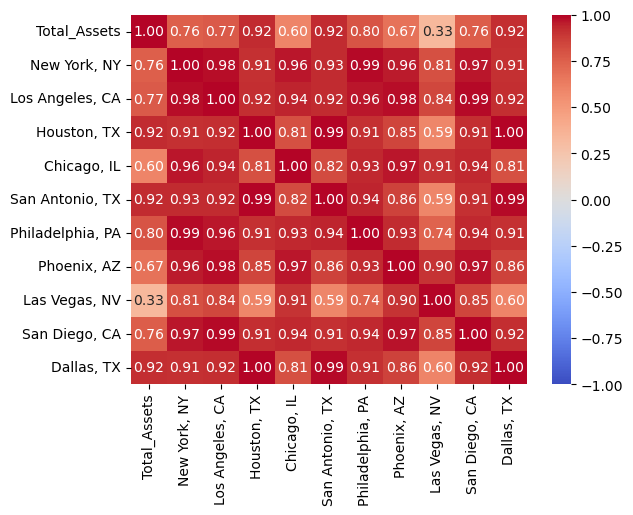

In [21]:
def seaborn(df, name):
    import matplotlib.pyplot as plt
    price_correlation = df.corr()
    sns.heatmap(price_correlation, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
    plt.savefig(name, dpi=300)
    
seaborn(fourbr, 'seaborn Metro 4BR vs Fed.png')